# Clustering Analysis
## K-Means, Hierarchical and DBSCAN

Dataset: EastWest Airlines

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:

# Load dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx')
df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:

# Data preprocessing
df_clean = df.drop(columns=['ID#']) if 'ID#' in df.columns else df
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)


In [4]:

# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


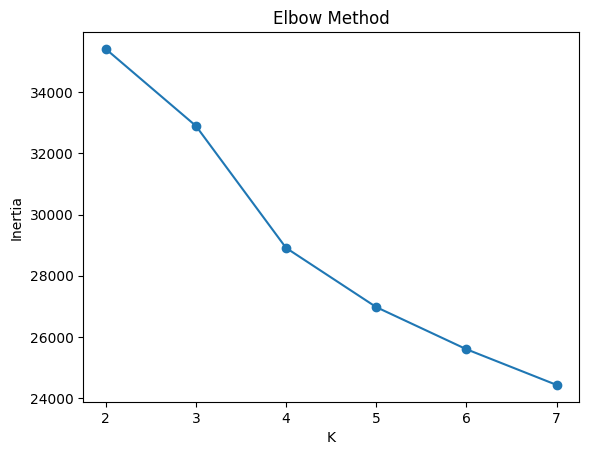

In [5]:

# Elbow Method for KMeans
inertia = []
K = range(2,8)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Silhouette Score (KMeans): 0.2674062376813128


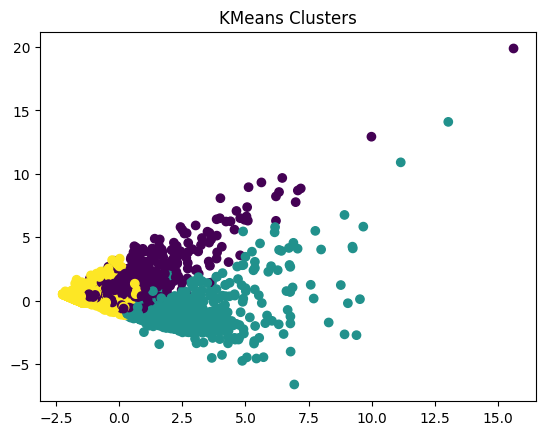

In [6]:

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

print("Silhouette Score (KMeans):", silhouette_score(scaled_data, kmeans_labels))

plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels)
plt.title('KMeans Clusters')
plt.show()


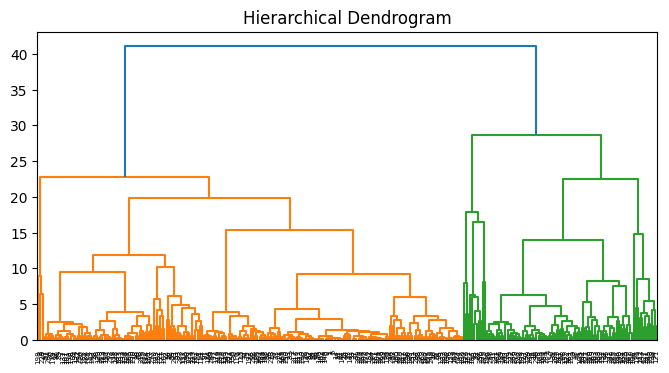

In [7]:

# Hierarchical Clustering
linked = linkage(scaled_data[:300], method='ward')

plt.figure(figsize=(8,4))
dendrogram(linked)
plt.title('Hierarchical Dendrogram')
plt.show()


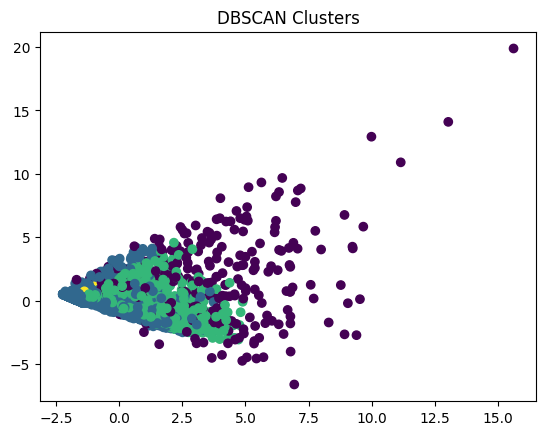

In [8]:

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)

plt.scatter(pca_data[:,0], pca_data[:,1], c=dbscan_labels)
plt.title('DBSCAN Clusters')
plt.show()
